# Importing Libraries & Dataset

In [1]:
#Path of the data set
dataPath = "train.csv"

#Import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import powerlaw

pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 60)

#Copy the data to a dataframe
rawdf = pd.read_csv(dataPath, sep=",", encoding= 'iso-8859-1', low_memory=False)
rawdf.shape

(550068, 12)

In [2]:
rawdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 39.9+ MB


In [3]:
rawdf.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

# Data Cleaning 

In [24]:
#Making a copy of raw dataframe
cleandf = rawdf.copy()

In [25]:
#Check the top 7 null value percentage
cleandf.isnull().sum().sort_values(ascending=False).head(7)/len(df)*100

Product_Category_3            69.672659
Product_Category_2            31.566643
Purchase                       0.000000
Product_Category_1             0.000000
Marital_Status                 0.000000
Stay_In_Current_City_Years     0.000000
City_Category                  0.000000
dtype: float64

In [26]:
# Drop columns which has greater than 30% null values and are not useful in our analysis
cleandf = cleandf.drop(['Product_Category_3'], axis= 1)
cleandf.isnull().sum().sort_values(ascending=False).head(7)/len(cleandf)*100

#Note: Here te catergory 2 is filled with 

Product_Category_2            31.566643
Purchase                       0.000000
Product_Category_1             0.000000
Marital_Status                 0.000000
Stay_In_Current_City_Years     0.000000
City_Category                  0.000000
Occupation                     0.000000
dtype: float64

In [27]:
# Treating the Product_Category_2 column
cleandf["Product_Category_2"].fillna(0, inplace = True)
cleandf.isnull().sum().sort_values(ascending=False).head(7)/len(cleandf)*100

Purchase                      0.0
Product_Category_2            0.0
Product_Category_1            0.0
Marital_Status                0.0
Stay_In_Current_City_Years    0.0
City_Category                 0.0
Occupation                    0.0
dtype: float64

In [28]:
cleandf["Product_Category_2"] = cleandf["Product_Category_2"].astype(int)
cleandf["Product_Category_2"].head()

0     0
1     6
2     0
3    14
4     0
Name: Product_Category_2, dtype: int32

In [29]:
#Dataframe data after Data Cleaning.
cleandf.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Purchase  
0                   0      8370  
1                   6     15200  
2                   0      1422  
3                  14      1057  
4                   0      7969

In [30]:
#Data frame Shape after Data cleaning
cleandf.shape

(550068, 11)

# Data Understanding

In [50]:
#Making copy of clean data frame
df = cleandf.copy()

## Univariate + Bivariate Analysis

Here, individual columns are analysed to columns.

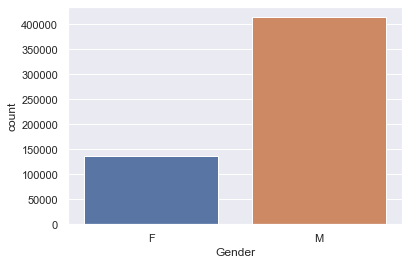

In [53]:
sns.countplot(df.Gender)

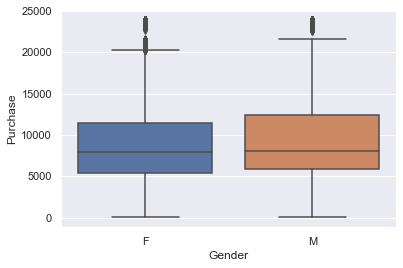

In [61]:
 sns.boxplot(x="Gender", y="Purchase", data=df)

Here is an important finding that approximately the male customers buy 3 times more products as compared to female. 
The indiviual purchase of male customer is also slighlty higher that the female customers.

**The company should focus on male customers more as compared to the female customers.**

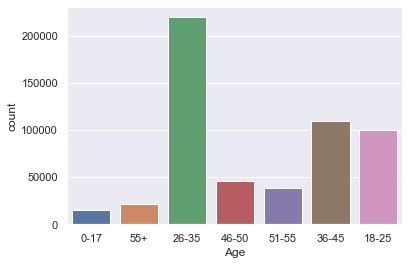

In [54]:
sns.countplot(df.Age)

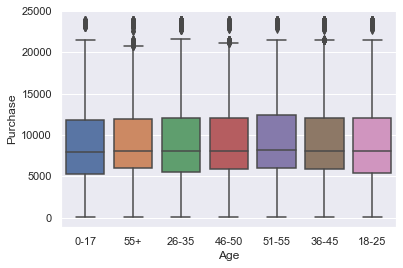

In [65]:
 sns.boxplot(x="Age", y="Purchase", data=df)

The customers between 26-35 age purchasing higher number of products as compared to the other age categories but the average indiviual spending across the age catergories is similar.

**The retail company should mostly focus on the ages categories between 18-45 and the most important been 26-35 age catergory.**

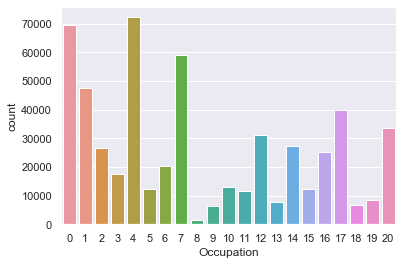

In [55]:
sns.countplot(df.Occupation)

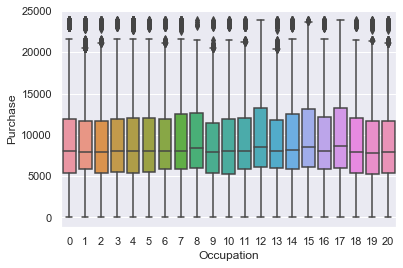

In [63]:
 sns.boxplot(x="Occupation", y="Purchase", data=df)

The occupation is 0, 4 & 7 are the top buyers.

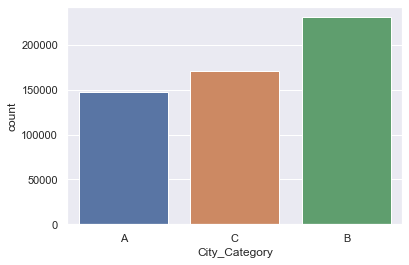

In [56]:
sns.countplot(df.City_Category)

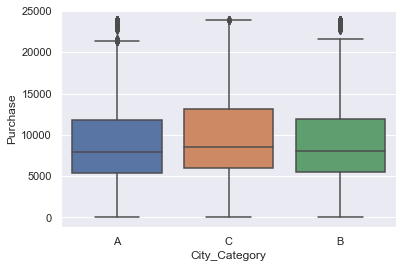

In [66]:
 sns.boxplot(x="City_Category", y="Purchase", data=df)

This is an intersting finding. The customers from city category B buy more products but the average indiviual cost of city category C is higher that city B.

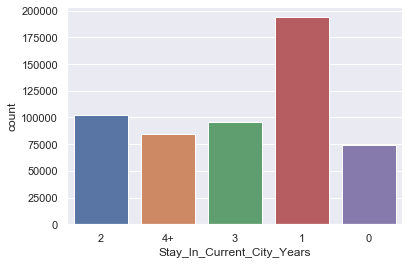

In [57]:
sns.countplot(df.Stay_In_Current_City_Years)

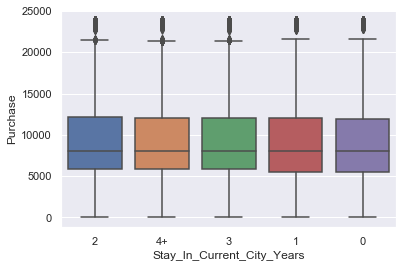

In [67]:
 sns.boxplot(x="Stay_In_Current_City_Years", y="Purchase", data=df)

The 1 year catergory i.e. customers who are staying the city for last 1 yeat are purchasing much more products than other categories. 

Retail company can consider this behaviour as well.

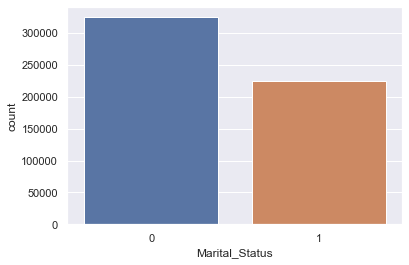

In [58]:
sns.countplot(df.Marital_Status)

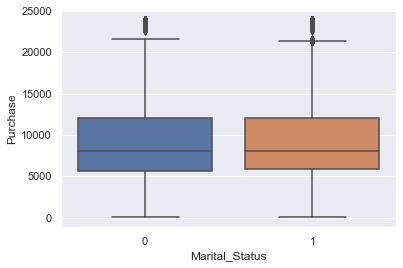

In [69]:
 sns.boxplot(x="Marital_Status", y="Purchase", data=df)

This is an interesting finding, we observe that the single person are buying more products in last month than the married indiviuals but on average an indiviual customer tends to spend same amount wheater he/she is married or not.

**The reatil company should make sure they consider single indiviuals while creating the offers.**

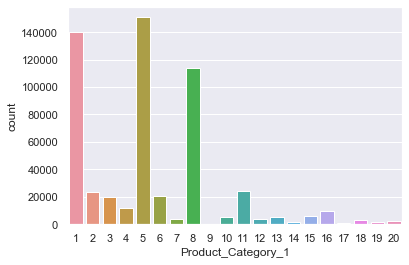

In [59]:
sns.countplot(df.Product_Category_1)

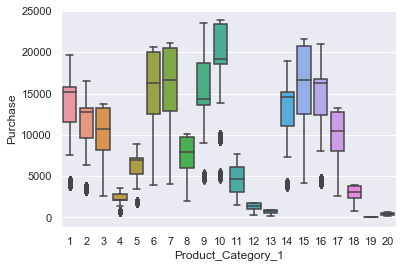

In [64]:
sns.boxplot(x="Product_Category_1", y="Purchase", data=df)

**1, 5 and 8 category have massively high purchase count and those product categories considered for the offers.**

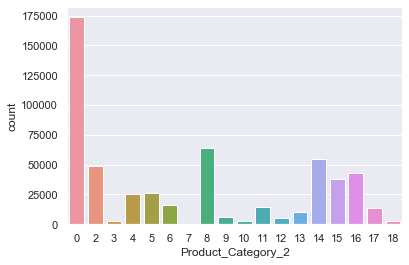

In [60]:
sns.countplot(df.Product_Category_2)

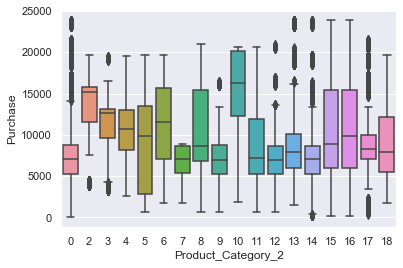

In [71]:
 sns.boxplot(x="Product_Category_2", y="Purchase", data=df)

The product belonging to only "Product_Category_1" are having very high purchase rate.

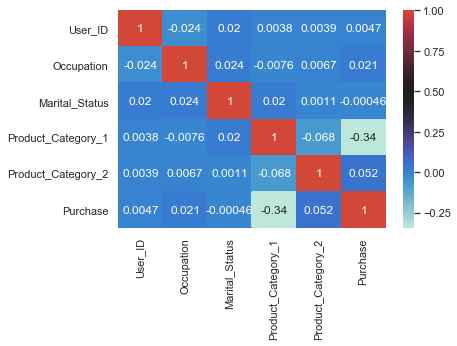

In [73]:
# Heat map for getting correlation value in between columns 
corr = df.corr()
sns.heatmap(corr, annot=True, center=0.5)
